## SVM中使用多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

X, y = datasets.make_moons()

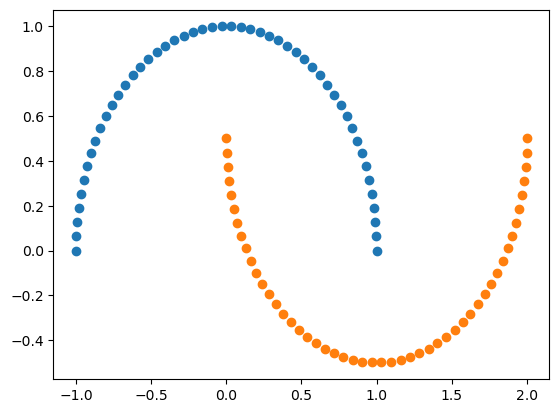

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()


In [5]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

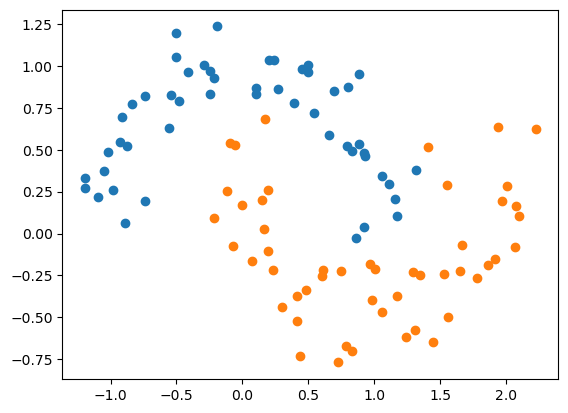

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 使用多项式特征的SVM

In [7]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C = 1.0):
  return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("LinearSVC", LinearSVC(C = C))
  ])

poly_svc = PolynomialSVC(degree=3);
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('LinearSVC', LinearSVC())])

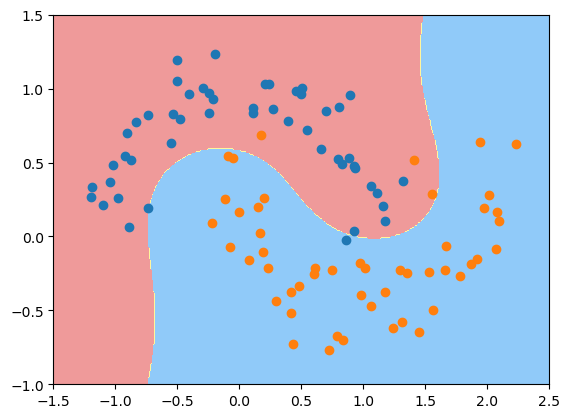

In [8]:
def plot_decision_boundary(model, axis):
  x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
  )
  X_new = np.c_[x0.ravel(), x1.ravel()]
  
  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)
  
  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
  
  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  
plot_decision_boundary(poly_svc, axis=[-1.5,2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [9]:
poly_svc.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=3)),
  ('std_scaler', StandardScaler()),
  ('LinearSVC', LinearSVC())],
 'verbose': False,
 'poly': PolynomialFeatures(degree=3),
 'std_scaler': StandardScaler(),
 'LinearSVC': LinearSVC(),
 'poly__degree': 3,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'std_scaler__copy': True,
 'std_scaler__with_mean': True,
 'std_scaler__with_std': True,
 'LinearSVC__C': 1.0,
 'LinearSVC__class_weight': None,
 'LinearSVC__dual': True,
 'LinearSVC__fit_intercept': True,
 'LinearSVC__intercept_scaling': 1,
 'LinearSVC__loss': 'squared_hinge',
 'LinearSVC__max_iter': 1000,
 'LinearSVC__multi_class': 'ovr',
 'LinearSVC__penalty': 'l2',
 'LinearSVC__random_state': None,
 'LinearSVC__tol': 0.0001,
 'LinearSVC__verbose': 0}

### 使用多项式核函数的SVM

In [10]:
from sklearn.svm import SVC

def PolynomialKernalSVC(degree, C = 1.0):
  return Pipeline([
    ("std_scaler", StandardScaler()),
    ("kernelSVC", SVC(kernel="poly", degree=degree, C = C))
  ])

poly_kernal_svc = PolynomialKernalSVC(degree=3);
poly_kernal_svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

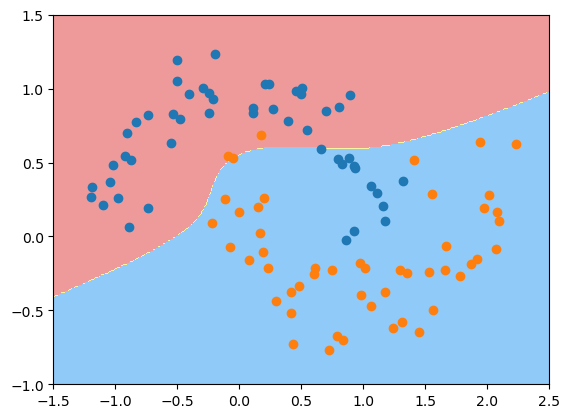

In [11]:
plot_decision_boundary(poly_kernal_svc, axis=[-1.5,2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### scikit-learn 中的RBF

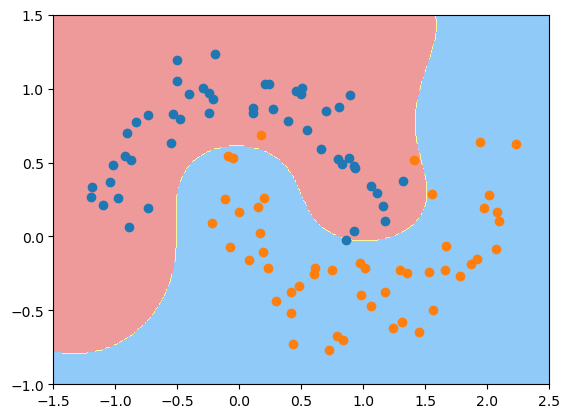

In [12]:
def RBFKernalSVC(gamma = 1.0):
  return Pipeline([
    ("std_scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", gamma=gamma))
  ])
  
  
  
svc = RBFKernalSVC(gamma=1.0)
svc.fit(X, y)

plot_decision_boundary(svc, axis=[-1.5,2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

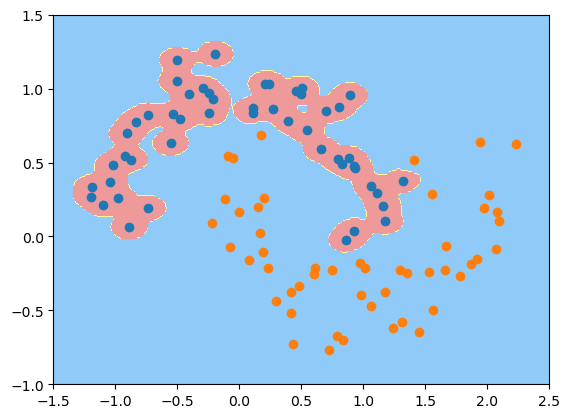

In [14]:
svc = RBFKernalSVC(gamma=100.0)
svc.fit(X, y)

plot_decision_boundary(svc, axis=[-1.5,2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

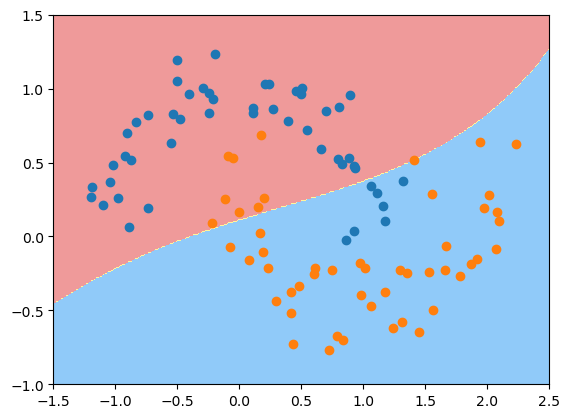

In [16]:
svc = RBFKernalSVC(gamma=0.1)
svc.fit(X, y)

plot_decision_boundary(svc, axis=[-1.5,2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()